In [2]:
import pandas as pd
from ast import literal_eval

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import re

tech_goodOrder = [
    "CCS",
    "BECCS",
    "DAC(CS)",
    "CCUS",
    "Soil Carbon Sequestration",
    "AR",
    "restoration of landscapes/peats",
    "Agroforestry",
    "Forest Management",
    "Biochar",
    "Enhanced Weathering (land based)",
    "Ocean alkalinity enhancement",
    "Blue Carbon",
    "Algae farming",
    "Ocean fertilization & Artificial upwelling",
    "General Literature on CDR/NET",
    
]

exclude_technologies = ["CCS", "CCUS", "Algae farming","Other technologies",]

tech_goodOrder = [t for t in tech_goodOrder if t not in exclude_technologies]

col_ccs = [
'#e6550d',
'#fdae6b'
] # '#fc8d59','#d7301f']# oranges
col_ccs.reverse() 
col_biochar =  ['#f768a1'] # violet
col_landbased = ['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c'] # greens
col_landbased.reverse() 
col_ew_landbased =  ['#c994c7'] # bright violet
col_ocean = ['#f1eef6','#bdc9e1','#74a9cf'] #,'#0570b0'] # blues
col_gen_other = ['#636363', '#bdbdbd'] # greys

color_tech = (
             col_ccs + 
             col_landbased +  
             col_biochar + 
             col_ew_landbased + 
             col_ocean +
             col_gen_other
)

tc = {}
for i, tech in enumerate(tech_goodOrder):
    tc[tech]=color_tech[i]

    
meth_dict = {
 'data analysis / statistical analysis / econometrics' : 'Data Analysis / Statistical Analysis / Econometrics',
 'experimental - field /fieldstudy': 'Experimental - Field Study',
 'experimental - laboratory': 'Experimental - Laboratory',
 'modelling': 'Modelling',
 'qualitative research': 'Qualitative Research',
 'review': 'Review',
 'survey': 'Survey',
 'systematic reviews': 'Systematic Review',
 'Unknown Method': 'Unknown Method',
 'Life Cycle Assessments': 'Life Cycle Assessment'
    
}
context_dict = {
 'earth system': 'Earth System',
 'equity & ethics':'Equity & Ethics',
 'policy/government': 'Policy / Government',
 'public perception': 'Public Perception',
 'socio-economic pathways': 'Socio-Economic Pathways',
 'technology': 'Technology'
}
context_labs = [context_dict[i] for i in context_dict.keys()]
tech_labs = ['BECCS',
 'DAC(CS)',
 'Soil Carbon Sequestration',
 'Afforestation/Reforestration',
 'Restoration of Landscapes/Peats',
 'Agroforestry',
 'Forest Management',
 'Biochar',
 'Enhanced Weathering',
 'Ocean Alkalinity Enhancement',
 'Blue Carbon',
 'Ocean Fertilization & Artificial Upwelling',
 'General Literature on CDR']

### Load and clean data

In [5]:
df_ex = pd.read_csv("data/allIds__allTech_in_pub_from_run_2023-06-18.csv")
field = pd.read_csv("data/2023-06-20_research_field.csv")

df_ex = df_ex.merge(field, how="left", on="id")
df_ex.loc[pd.isna(df_ex["OECD_research_field"]), "OECD_research_field"] = "no research field"

df = df_ex.groupby(['id', 'first_pred_tech', 'OECD_research_field'], as_index=False).agg({'all_pred_tech':lambda x: list(x)})

In [6]:
meths = pd.read_csv("data/2023-06-18_meth_predicted_unbalanced_hyperparamTuning.csv", converters={"all_pred_meth": literal_eval})
meths_ex = meths.explode("all_pred_meth")
meths_ex.loc[meths_ex["all_pred_meth"]=='statistical analysis / econometrics'] = 'data analysis / statistical analysis / econometrics'
meths_ex.drop_duplicates()
print(meths_ex.shape)

# add meta-analysis studies
with open("data/ids_metananlysis_in_titeAbstract.txt") as f:
    meta_ids = f.readlines()
    meta_ids = [int(i) for i in meta_ids]
    
meths_meta = meths_ex.loc[meths_ex.id.isin(meta_ids)]
print(meths_meta.shape)
meths_meta = meths_meta.drop_duplicates(subset=['id'])
print(meths_meta.shape)
meths_meta["all_pred_meth"] = "systematic reviews"
meths_ex = pd.concat([meths_ex, meths_meta])

print(df_ex.shape)
df_ex_meth = df_ex.merge(meths_ex[['id','all_pred_meth']], on='id', how='left')
print(df_ex_meth.shape)

(103363, 37)
(75, 37)
(52, 37)
(37776, 4)
(43492, 5)


In [7]:
context = pd.read_csv("data/2023-06-18_context_predicted_unbalanced_hyperparamTuning.csv", converters={"all_pred_context": literal_eval})
context_ex = context.explode("all_pred_context")
print(df_ex.shape)
df_ex_context = df_ex.merge(context_ex[['id','all_pred_context']], on='id', how='left')
print(df_ex_context.shape)

(37776, 4)
(39463, 5)


### Total pubs

In [8]:
num_pubs = len(df)
num_technologies = df_ex.all_pred_tech.value_counts()
num_technologies = num_technologies.reindex(tech_goodOrder)

In [6]:
num_technologies

BECCS                                          1617
DAC(CS)                                         822
Soil Carbon Sequestration                      6979
AR                                             3468
restoration of landscapes/peats                1037
Agroforestry                                   2817
Forest Management                              1366
Biochar                                       16232
Enhanced Weathering (land based)                406
Ocean alkalinity enhancement                    152
Blue Carbon                                    1378
Ocean fertilization & Artificial upwelling      410
General Literature on CDR/NET                  1092
Name: all_pred_tech, dtype: int64

Text(-0.5, -0.1, '28976')

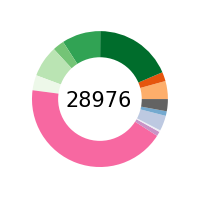

In [6]:
color = [tc[t] for t in num_technologies.index]
size_of_groups = num_technologies

fig, ax = plt.subplots(dpi=150, figsize=(1.5,1.5))
# Create a pieplot
plt.pie(size_of_groups, colors=color)
white_circle = plt.Circle( (0,0), 0.6, color='white')
p = plt.gcf()
p.gca().add_artist(white_circle)
plt.text(-.50, -.10, num_pubs, fontsize=10)

In [9]:
tech_numbers = pd.DataFrame(df.groupby("first_pred_tech").size())
tech_numbers = pd.DataFrame(df_ex.groupby("all_pred_tech").size())
tech_numbers = tech_numbers.reindex(tech_goodOrder)
tech_numbers.to_excel("data/papers_mention_technology.xlsx")

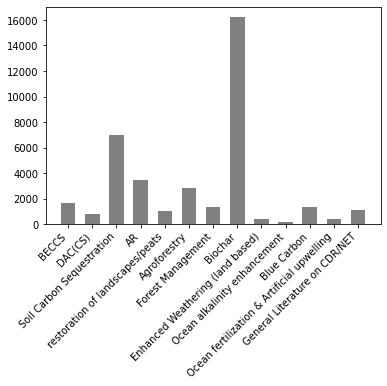

In [10]:
fig, ax = plt.subplots()
width=0.6
ax.bar(tech_numbers.index, tech_numbers[0], fc='grey',width=width)
_=plt.xticks(rotation=45, ha='right',)

### Research Field

In [11]:
tech_field = df_ex.groupby(['all_pred_tech','OECD_research_field'],as_index=False).size()

all_techs = df_ex.groupby("all_pred_tech",as_index=False).size().rename(columns={"size":"all_tech"})

all_fields = tech_field['OECD_research_field'].unique().tolist()
all_fields_nonofield = [f for f in all_fields if 'no' not in f]

### with "no field"
for field in all_fields:
    for tech in tech_goodOrder:
        if tech_field.loc[(tech_field.OECD_research_field==field)&(tech_field.all_pred_tech==tech)].shape[0]==0:
            one_row = pd.DataFrame({'OECD_research_field': [field], "all_pred_tech": [tech], 'size': [0]})
            tech_field = pd.concat([tech_field, one_row], ignore_index = True)
            
# sort techs according to tech_goodOrder
sort_tech = {}
for idx, t in enumerate(tech_goodOrder):
    sort_tech[t] = f'{str(idx).zfill(2)} {t}' 
tech_field["sort_tech"] = tech_field.all_pred_tech.replace(sort_tech)
tech_field = tech_field.sort_values("sort_tech")

tech_field = tech_field.merge(all_techs, on="all_pred_tech", how="left")
tech_field["rel_count"] = tech_field["size"]/tech_field.all_tech


### without "no field"
tech_field_nonofield = tech_field.loc[tech_field["OECD_research_field"] != "no research field"]
all_tech_wo_nofield = tech_field_nonofield.groupby("all_pred_tech", as_index=False)["size"].sum().rename(columns={"size":"all_tech"})
tech_field_nonofield = tech_field_nonofield.drop(columns=["all_tech"]).merge(all_tech_wo_nofield, on="all_pred_tech")
tech_field_nonofield["rel_count"] = tech_field_nonofield["size"]/tech_field_nonofield["all_tech"]

In [8]:
tech_field_nonofield["size"].sum()

28933

In [12]:
rel = pd.DataFrame(df_ex.drop_duplicates(subset=["id","OECD_research_field"]).groupby("OECD_research_field").size()/df_ex.id.nunique())
tot = pd.DataFrame(df_ex.drop_duplicates(subset=["id","OECD_research_field"]).groupby("OECD_research_field").size())#.to_excel("paper_per_researcg")
tot.merge(rel, right_index=True, left_index=True).to_excel("data/paper_per_research_field.xlsx")

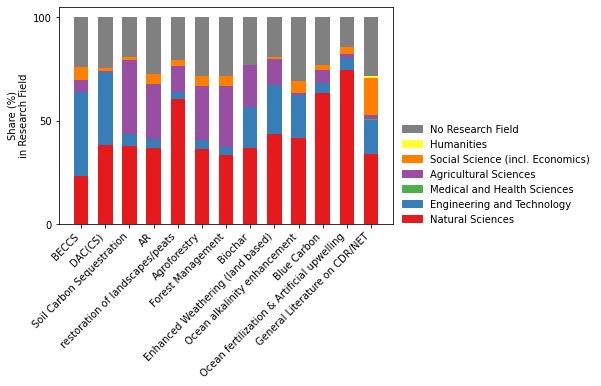

In [13]:
cols = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','grey',]
field_col = {}
for idx, f in enumerate(all_fields):
    field_col[f] = cols[idx]

fig, ax = plt.subplots()
width = 0.6

field_labs = {}
for field in all_fields[:-1]:
    field_str = field.split(re.findall('[0-9] ',field)[0])[-1].lower()
    field_str = field_str.title().replace('And', 'and')
    field_labs[field] = field_str    
field_labs[all_fields[-1]] = 'No Research Field'

prev_values = np.zeros(len(tech_field.loc[tech_field.OECD_research_field==all_fields[-1]]))
for i, field in enumerate(all_fields):
    ax.bar(tech_goodOrder, tech_field.loc[tech_field.OECD_research_field==field,"rel_count"], 
              width, 
              bottom=prev_values, 
              label=field_labs[field],
              color=field_col[field])
    prev_values += np.array(tech_field.loc[tech_field.OECD_research_field==field,"rel_count"])
ax.set_ylabel('Share (%)\nin Research Field')
ax.set_yticks([0,0.5,1], [0,50,100])
plt.xticks(rotation=45, ha='right',)

legend_labels = []
for f in all_fields[::-1]:
    if 'Social' in field_labs[f]:
        lab = 'Social Science (incl. Economics)'
    else:
        lab = field_labs[f]
    legend_labels.append(mpatches.Patch(color=field_col[f], label=lab))
    

plt.legend(handles=legend_labels, bbox_to_anchor=(1, 0.5), frameon=False)
fig.savefig("figures/researchField_per_tech.png", bbox_inches="tight", facecolor='white', edgecolor='none')

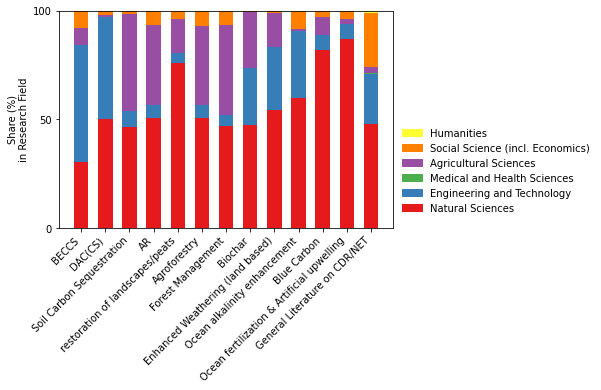

In [14]:
fig, ax = plt.subplots()
width = 0.6

prev_values = np.zeros(len(tech_field_nonofield.loc[tech_field_nonofield.OECD_research_field==all_fields_nonofield[0]]))
for i, field in enumerate(all_fields_nonofield):
    ax.bar(tech_goodOrder, tech_field_nonofield.loc[tech_field_nonofield.OECD_research_field==field,"rel_count"], 
              width, 
              bottom=prev_values, 
              label=field_labs[field],
              color=field_col[field])
    prev_values += np.array(tech_field_nonofield.loc[tech_field_nonofield.OECD_research_field==field,"rel_count"])
ax.set_ylabel('Share (%)\nin Research Field')
ax.set_yticks([0,0.5,1], [0,50,100])
plt.xticks(rotation=45, ha='right',)

legend_labels = []
for f in all_fields_nonofield[::-1]:
    if 'Social' in field_labs[f]:
        lab = 'Social Science (incl. Economics)'
    else:
        lab = field_labs[f]
    legend_labels.append(mpatches.Patch(color=field_col[f], label=lab))

plt.legend(handles=legend_labels, bbox_to_anchor=(1, 0.5), frameon=False)

### Methodology

In [15]:
tech_meth = df_ex_meth.groupby(['all_pred_tech','all_pred_meth'],as_index=False).size()

all_techs_m = df_ex_meth.groupby("all_pred_tech",as_index=False).size().rename(columns={"size":"all_tech"})
all_meths = tech_meth['all_pred_meth'].unique().tolist()
for meth in all_meths:
    for tech in tech_goodOrder:
        if tech_meth.loc[(tech_meth.all_pred_meth==meth)&(tech_meth.all_pred_tech==tech)].shape[0]==0:
            print(tech, meth)
            one_row = pd.DataFrame({'all_pred_meth': [meth], "all_pred_tech": [tech], 'size': [0]})
            tech_meth = pd.concat([tech_meth, one_row], ignore_index = True)
            
# sort techs according to tech_goodOrder
sort_tech = {}
for idx, t in enumerate(tech_goodOrder):
    sort_tech[t] = f'{str(idx).zfill(2)} {t}'
tech_meth["sort_tech"] = tech_meth.all_pred_tech.replace(sort_tech)
tech_meth = tech_meth.sort_values("sort_tech")

tech_meth = tech_meth.merge(all_techs_m, on="all_pred_tech", how="left")
tech_meth["rel_count"] = tech_meth["size"]/tech_meth.all_tech
tech_meth.to_excel("data/tech_methodology.xlsx")

Ocean fertilization & Artificial upwelling survey


In [16]:
exp = ['experimental - field /fieldstudy',
 'experimental - laboratory']
modelling = ['modelling','data analysis / statistical analysis / econometrics','Life Cycle Assessments']
qualit = ['review','systematic reviews','survey','qualitative research']
unknown = ['Unknown Method']

col_exp = ['#a6bddb','#1c9099'] # green-blue
col_model = ['#fdbe85','#fd8d3c','#d94701'] # oranges
col_qual = ['#feebe2','#fbb4b9','#f768a1','#ae017e'] # pinks
col_unk = ['#cccccc']

col_meths = col_exp + col_model + col_qual + col_unk
meth_goodOrder = exp + modelling + qualit + unknown

mc = {}
for idx, m in enumerate(meth_goodOrder):
    mc[m] = col_meths[idx]

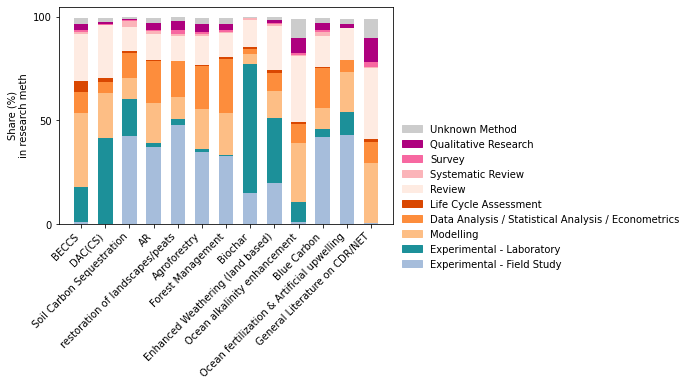

In [17]:
fig, ax = plt.subplots()
width = 0.6

prev_values = np.zeros(len(tech_meth.loc[tech_meth.all_pred_meth==all_meths[0]]))
for i, meth in enumerate(meth_goodOrder):
    ax.bar(tech_goodOrder, tech_meth.loc[tech_meth.all_pred_meth==meth,"rel_count"], 
              width, 
              bottom=prev_values, 
              label=meth,
              color=mc[meth])
    prev_values += np.array(tech_meth.loc[tech_meth.all_pred_meth==meth,"rel_count"])
ax.set_ylabel('Share (%)\nin research meth')
ax.set_yticks([0,0.5,1], [0,50,100])
plt.xticks(rotation=45, ha='right',)

legend_labels = []
for m in meth_goodOrder[::-1]:
    legend_labels.append(mpatches.Patch(color=mc[m], label=meth_dict[m]))

plt.legend(handles=legend_labels, bbox_to_anchor=(1, 0.5), frameon=False)


In [18]:
tech_meth.loc[tech_meth.all_pred_meth=="review"].sort_values("rel_count")

,all_pred_tech,all_pred_meth,size,sort_tech,all_tech,rel_count
66,Forest Management,review,195,06 Forest Management,1673,0.116557
24,Soil Carbon Sequestration,review,944,02 Soil Carbon Sequestration,8055,0.117194
46,restoration of landscapes/peats,review,145,04 restoration of landscapes/peats,1237,0.117219
39,AR,review,504,03 AR,4131,0.122004
71,Biochar,review,2289,07 Biochar,18086,0.126562
50,Agroforestry,review,464,05 Agroforestry,3377,0.137400
100,Blue Carbon,review,254,10 Blue Carbon,1701,0.149324
112,Ocean fertilization & Artificial upwelling,review,70,11 Ocean fertilization & Artificial upwelling,458,0.152838
82,Enhanced Weathering (land based),review,97,08 Enhanced Weathering (land based),459,0.211329
1,BECCS,review,430,00 BECCS,1887,0.227875


### Context

In [19]:
tech_context = df_ex_context.groupby(['all_pred_tech','all_pred_context'],as_index=False).size()

all_techs_c = df_ex_context.groupby("all_pred_tech",as_index=False).size().rename(columns={"size":"all_tech"})
all_contexts = tech_context['all_pred_context'].unique().tolist()
for contex in all_contexts:
    for tech in tech_goodOrder:
        if tech_context.loc[(tech_context.all_pred_context==contex)&(tech_context.all_pred_tech==tech)].shape[0]==0:
            print(tech, contex)
            one_row = pd.DataFrame({'all_pred_context': [contex], "all_pred_tech": [tech], 'size': [0]})
            tech_context = pd.concat([tech_context, one_row], ignore_index = True)
            
# sort techs according to tech_goodOrder
sort_tech = {}
for idx, t in enumerate(tech_goodOrder):
    sort_tech[t] = f'{str(idx).zfill(2)} {t}'
tech_context["sort_tech"] = tech_context.all_pred_tech.replace(sort_tech)
tech_context = tech_context.sort_values("sort_tech")

tech_context = tech_context.merge(all_techs_c, on="all_pred_tech", how="left")
tech_context["rel_count"] = tech_context["size"]/tech_context.all_tech
tech_context.to_excel("data/tech_contextodology.xlsx")

Enhanced Weathering (land based) earth system
Soil Carbon Sequestration equity & ethics
restoration of landscapes/peats equity & ethics
Biochar equity & ethics
Enhanced Weathering (land based) equity & ethics


In [20]:
ccols = {}
for i, c in enumerate(all_contexts[-1::-1]):
    ccols[c] = context_cols[i]

NameError: name 'context_cols' is not defined

Earth System


KeyError: 'earth system'

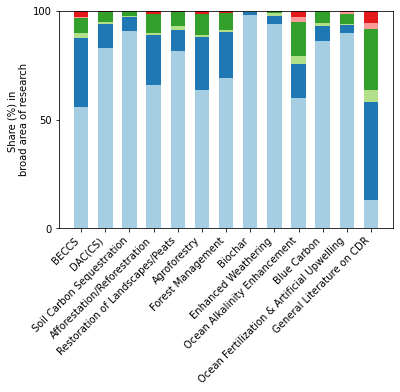

In [21]:
fig, ax = plt.subplots()
width = 0.6

context_cols = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

prev_values = np.zeros(len(tech_context.loc[tech_context.all_pred_context==all_contexts[0]]))
for i, cont in enumerate(all_contexts[::-1]):
    ax.bar(tech_goodOrder, tech_context.loc[tech_context.all_pred_context==cont,"rel_count"], 
              width, 
              bottom=prev_values, 
              label=cont,
              color=context_cols[i])
    prev_values += np.array(tech_context.loc[tech_context.all_pred_context==cont,"rel_count"])
ax.set_ylabel('Share (%) in \nbroad area of research')
ax.set_yticks([0,0.5,1], [0,50,100])
ax.set_xticks([i for i in range(len(tech_labs))], tech_labs)
plt.xticks(rotation=45, ha='right',)

  
legend_labels=[]
for i, f in enumerate(all_contexts):
    print(context_dict[f])
    legend_labels.append(mpatches.Patch(color=ccols[f], label=context_dict[f]))

plt.legend(handles=legend_labels, bbox_to_anchor=(1, 0.5), frameon=False)

fig.savefig("figures/context_per_tech.png", bbox_inches="tight", facecolor='white', edgecolor='none')

### All together - field, methodology, context

/tmp/ipykernel_22199/646207642.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['' for i in tech_goodOrder])
/tmp/ipykernel_22199/646207642.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['' for i in tech_goodOrder])


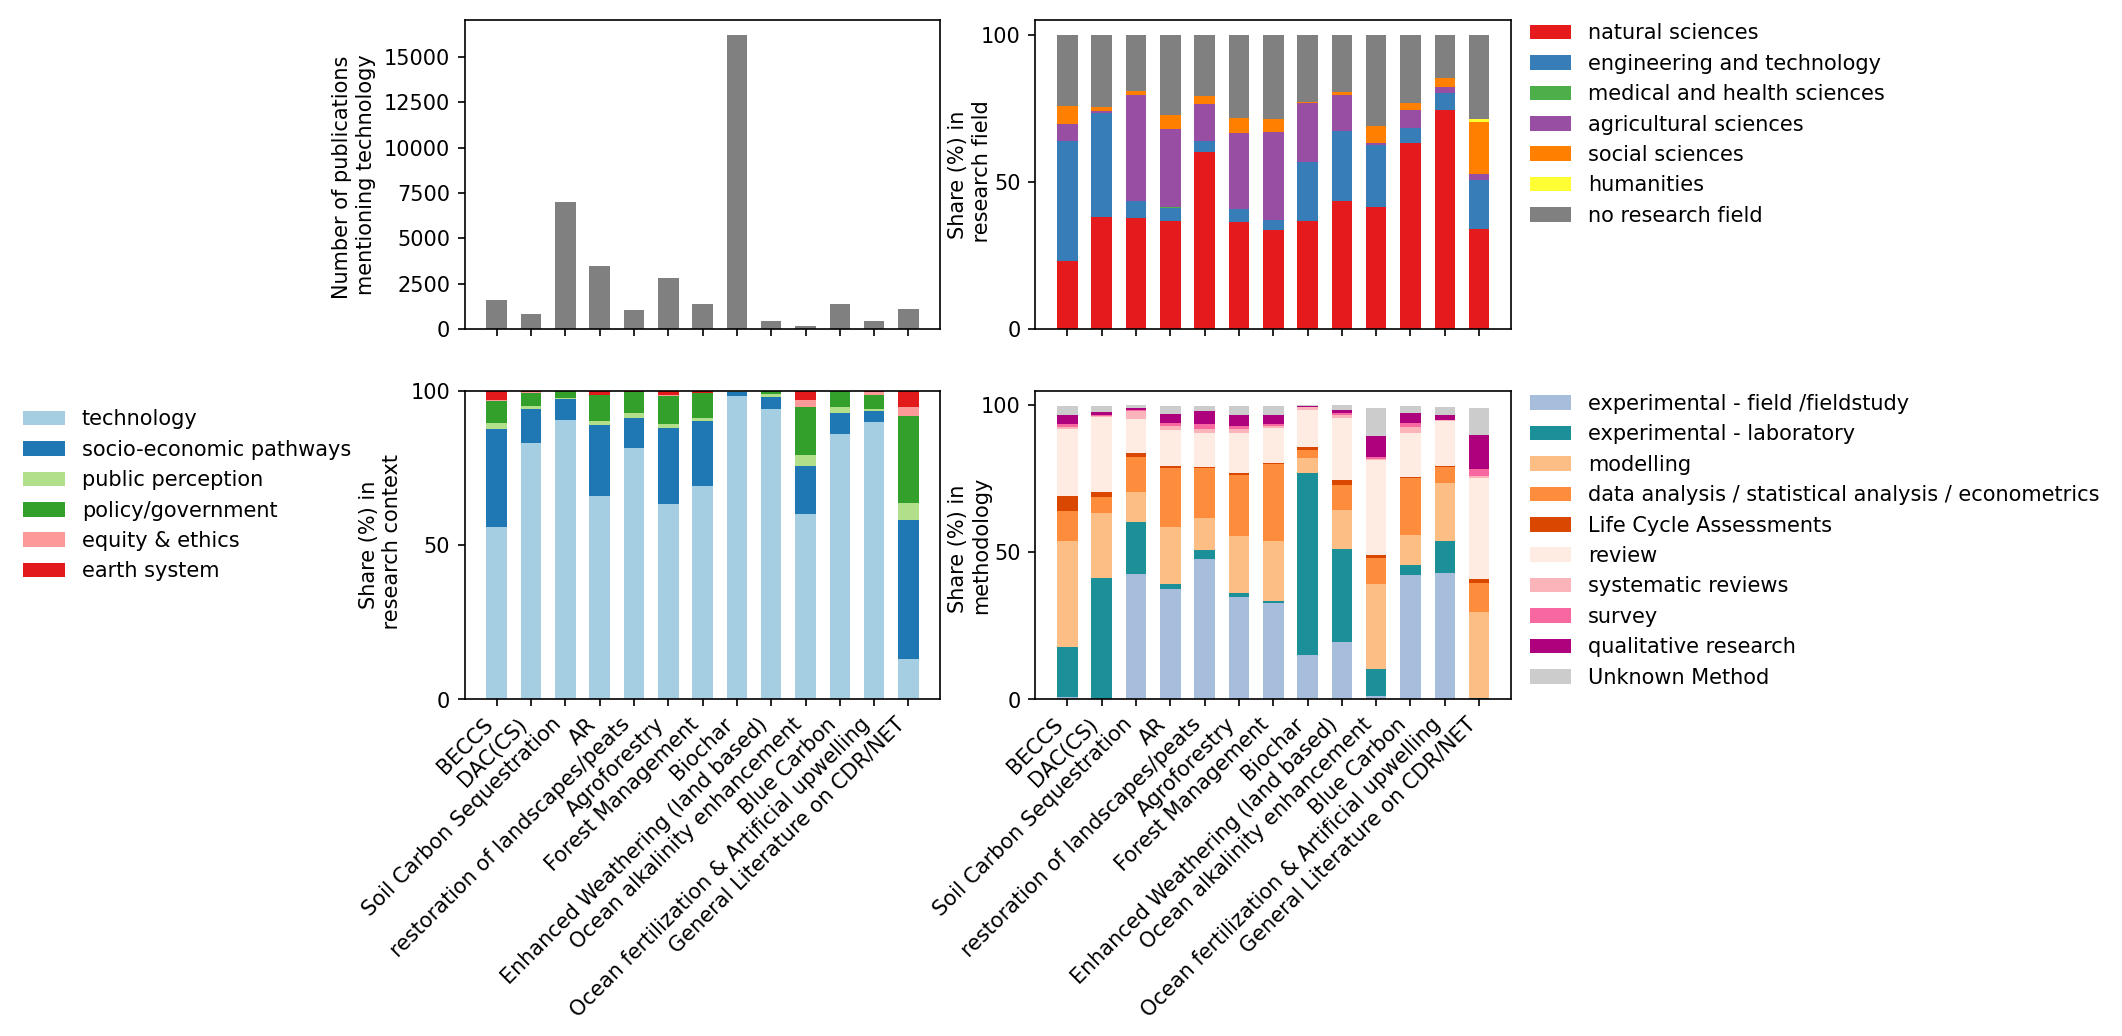

In [22]:
fig = plt.figure(figsize=(9, 6),dpi=150)
gs = fig.add_gridspec(2,2)

barwidth = 0.6

### NUMBER TECHNOLOGIES #################
ax1 = fig.add_subplot(gs[0,0])
width=0.6
ax1.bar(tech_numbers.index, tech_numbers[0], fc='grey',width=barwidth)
ax1.set_xticklabels(['' for i in tech_goodOrder])
ax1.set_ylabel("Number of publications \nmentioning technology")

### RESEARCH FIELD ######################
ax2 = fig.add_subplot(gs[0,1])
cols = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','grey']
field_col = {}
for idx, f in enumerate(all_fields):
    field_col[f] = cols[idx]

field_labs = {}
for field in all_fields[:-1]:
    field_labs[field] = field.split(re.findall('[0-9] ',field)[0])[-1].lower()
    field_labs[all_fields[-1]] = all_fields[-1]

prev_values = np.zeros(len(tech_field.loc[tech_field.OECD_research_field==all_fields[0]]))
for i, field in enumerate(all_fields):
    ax2.bar(tech_goodOrder, tech_field.loc[tech_field.OECD_research_field==field,"rel_count"], 
              width=barwidth, 
              bottom=prev_values, 
              label=field_labs[field],
              color=field_col[field])
    prev_values += np.array(tech_field.loc[tech_field.OECD_research_field==field,"rel_count"])
ax2.set_ylabel('Share (%) in\n research field', labelpad=-5)
ax2.set_yticks([0,0.5,1], [0,50,100])
ax2.set_xticklabels(['' for i in tech_goodOrder])
plt.xticks(rotation=45, ha='right',)
plt.legend(bbox_to_anchor=(1, 1.05),frameon=False)


### METHODOLOGY ##########################
ax3 = fig.add_subplot(gs[1,1])

prev_values = np.zeros(len(tech_meth.loc[tech_meth.all_pred_meth==all_meths[0]]))
for i, meth in enumerate(meth_goodOrder):
    ax3.bar(tech_goodOrder, tech_meth.loc[tech_meth.all_pred_meth==meth,"rel_count"], 
              width=barwidth, 
              bottom=prev_values, 
              label=meth,
              color=mc[meth])
    prev_values += np.array(tech_meth.loc[tech_meth.all_pred_meth==meth,"rel_count"])
ax3.set_ylabel('Share (%) in \nmethodology', labelpad=-5)
ax3.set_yticks([0,0.5,1], [0,50,100])
plt.xticks(rotation=45, ha='right',)
plt.legend(bbox_to_anchor=(1, 1.05),frameon=False)
fig.savefig("figures/methodologies_co.png", bbox_inches="tight", facecolor='white', edgecolor='none')


### CONTEXT ###############################
ax4 = fig.add_subplot(gs[1,0])

context_cols = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

prev_values = np.zeros(len(tech_context.loc[tech_context.all_pred_context==all_contexts[0]]))
for i, cont in enumerate(all_contexts[::-1]):
    ax4.bar(tech_goodOrder, tech_context.loc[tech_context.all_pred_context==cont,"rel_count"], 
              width, 
              bottom=prev_values, 
              label=cont,
              color=context_cols[i])
    prev_values += np.array(tech_context.loc[tech_context.all_pred_context==cont,"rel_count"])
ax4.set_ylabel('Share (%) in\n research context')
ax4.set_yticks([0,0.5,1], [0,50,100])
plt.xticks(rotation=45, ha='right',)
plt.legend(bbox_to_anchor=(-0.2, 1), frameon=False)

fig.savefig("figures/meth_field_context.png", bbox_inches="tight", facecolor='white', edgecolor='none')

### All together - field, methodology

In [40]:
all_fields_nonofield

['1 NATURAL SCIENCES',
 '2 ENGINEERING AND TECHNOLOGY',
 '3 MEDICAL AND HEALTH SCIENCES',
 '4 AGRICULTURAL SCIENCES',
 '5 SOCIAL SCIENCES',
 '6 HUMANITIES']

/tmp/ipykernel_22199/2690349125.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['' for i in tech_goodOrder])
/tmp/ipykernel_22199/2690349125.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['' for i in tech_goodOrder])


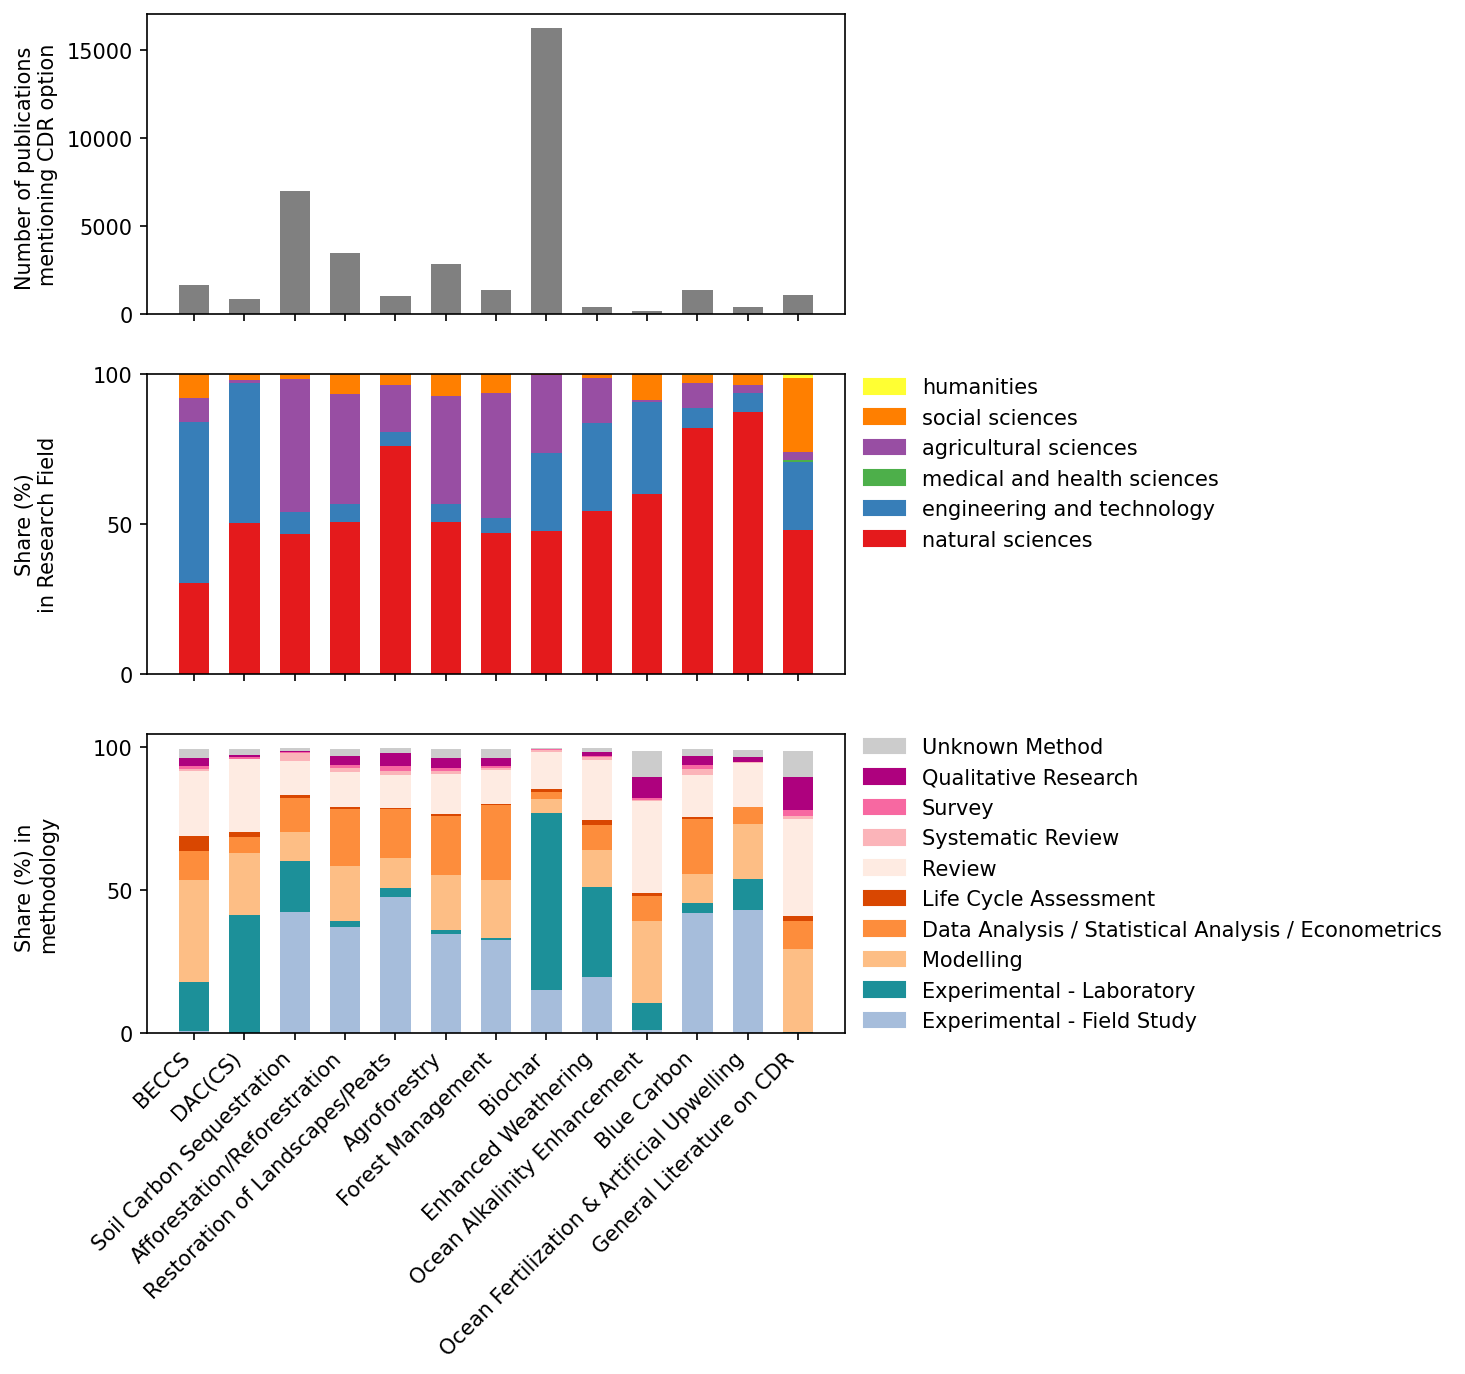

In [23]:
fig = plt.figure(figsize=(6, 9),dpi=150)
gs = fig.add_gridspec(3,1)

barwidth = 0.6

### NUMBER TECHNOLOGIES #################
ax1 = fig.add_subplot(gs[0,0])
width=0.6
ax1.bar(tech_numbers.index, tech_numbers[0], fc='grey',width=barwidth)
ax1.set_xticklabels(['' for i in tech_goodOrder])
ax1.set_yticks([0,5000,10000,15000])
ax1.set_ylabel("Number of publications \nmentioning CDR option")

### RESEARCH FIELD ######################
ax2 = fig.add_subplot(gs[1,0])

prev_values = np.zeros(len(tech_field_nonofield.loc[tech_field_nonofield.OECD_research_field==all_fields_nonofield[0]]))
for i, field in enumerate(all_fields_nonofield):
    ax2.bar(tech_goodOrder, tech_field_nonofield.loc[tech_field_nonofield.OECD_research_field==field,"rel_count"], 
              width, 
              bottom=prev_values, 
              label=field_labs[field],
              color=field_col[field])
    prev_values += np.array(tech_field_nonofield.loc[tech_field_nonofield.OECD_research_field==field,"rel_count"])
ax2.set_ylabel('Share (%)\nin Research Field')
ax2.set_yticks([0,0.5,1], [0,50,100])
ax2.set_xticklabels(['' for i in tech_goodOrder])

legend_labels = []
for f in all_fields_nonofield[::-1]:
    if 'Social' in field_labs[f]:
        lab = 'Social Science (incl. Economics)'
    else:
        lab = field_labs[f]    
    legend_labels.append(mpatches.Patch(color=field_col[f], label=lab))

plt.legend(handles=legend_labels, bbox_to_anchor=(1, 1.05), frameon=False)


### METHODOLOGY ##########################
ax3 = fig.add_subplot(gs[2,0])

prev_values = np.zeros(len(tech_meth.loc[tech_meth.all_pred_meth==all_meths[0]]))
for i, meth in enumerate(meth_goodOrder):
    ax3.bar(tech_goodOrder, tech_meth.loc[tech_meth.all_pred_meth==meth,"rel_count"], 
              width=barwidth, 
              bottom=prev_values, 
              label=meth,
              color=mc[meth])
    prev_values += np.array(tech_meth.loc[tech_meth.all_pred_meth==meth,"rel_count"])
ax3.set_ylabel('Share (%) in \nmethodology')
ax3.set_yticks([0,0.5,1], [0,50,100])
ax3.set_xticks([i for i in range(len(tech_labs))], tech_labs)
plt.xticks(rotation=45, ha='right',)
legend_labels = []
for m in meth_goodOrder[::-1]:
    legend_labels.append(mpatches.Patch(color=mc[m], label=meth_dict[m]))

plt.legend(handles=legend_labels, bbox_to_anchor=(1, 1.05), frameon=False)

fig.align_ylabels()


fig.savefig("figures/meth_field.png", bbox_inches="tight", facecolor='white', edgecolor='none')

### Pathway literature

In [31]:
pathway = df_ex_context.loc[df_ex_context["all_pred_context"]=="socio-economic pathways"]

In [33]:
pathway

,id,all_pred_tech,first_pred_tech,OECD_research_field,all_pred_context
7,5343144,General Literature on CDR/NET,General Literature on CDR/NET,no research field,socio-economic pathways
16,222266,Ocean alkalinity enhancement,CCS,no research field,socio-economic pathways
32,714055,Biochar,Biochar,2 ENGINEERING AND TECHNOLOGY,socio-economic pathways
38,95108,Biochar,Biochar,1 NATURAL SCIENCES,socio-economic pathways
39,95108,Soil Carbon Sequestration,Biochar,1 NATURAL SCIENCES,socio-economic pathways
...,...,...,...,...,...
39400,424589,AR,Forest Management,no research field,socio-economic pathways
39406,3877226,General Literature on CDR/NET,General Literature on CDR/NET,5 SOCIAL SCIENCES,socio-economic pathways
39417,2316889,General Literature on CDR/NET,General Literature on CDR/NET,1 NATURAL SCIENCES,socio-economic pathways
39428,5241231,Blue Carbon,Blue Carbon,4 AGRICULTURAL SCIENCES,socio-economic pathways


In [34]:
pathway_gr = pathway.groupby("id").agg({"all_pred_tech": list,
                                        })

In [37]:
all_info = pd.read_csv("/home/sarah/projects/nets/data/wos_scopus_all.csv")

In [39]:
pathway_gr = pathway_gr.merge(all_info[["id", "title", "abstract", "year"]], on="id", how="left")

In [42]:
pathway_gr["num_tech"] = pathway_gr["all_pred_tech"].apply(len)
pathway_gr = pathway_gr.sort_values("num_tech", ascending=False)
for i,row in pathway_gr[:10].iterrows():
    print(row["all_pred_tech"])
    print(row["title"])
    print(row["abstract"])
    print()

['Agroforestry', 'AR', 'Biochar', 'DAC(CS)', 'BECCS', 'Enhanced Weathering (land based)', 'General Literature on CDR/NET']
Negative Emissions: Priorities for Research and Policy Design
The large-scale removal of carbon dioxide from the atmosphere is likely to be important in maintaining temperature rise “well below” 2°C, and vital in achieving the most stringent 1.5°C target. Whilst various literature efforts have estimated the global potential of carbon dioxide removal (CDR) for a range of technologies with different degrees of certainty, regional bottlenecks for their deployment remain largely overlooked. Quantifying these barriers, through national and local case studies, rather than with aggregated approaches, would guide policy and research, as well as investments, toward regions that are likely to play a prominent role in CDR deployment. Five CDR technologies—including afforestation/reforestation, bioenergy with carbon capture and storage, biochar, direct air capture and enhanced

### Save Data as Excel

In [32]:
tech_numbers.rename(columns={0:"num_documents"}).to_excel('figures/fig_data/fig_tech_meth_context__papers_per_technology.xlsx')

In [33]:
tech_meth.to_excel('figures/fig_data/fig_tech_meth_context__papers_per_tech_meth.xlsx')

In [34]:
tech_context.to_excel('figures/fig_data/fig_tech_meth_context__papers_per_tech_context.xlsx')

In [35]:
tech_field.to_excel('figures/fig_data/fig_tech_meth_context__papers_per_tech_OECDField.xlsx')

### Some Analysis for paper

In [37]:
sum(context.predOptimal_technology)/context.shape[0]

0.8921964836263645

In [39]:
tech_context.loc[tech_context.all_pred_context=="technology"]

,all_pred_tech,all_pred_context,size,sort_tech,all_tech,rel_count
4,BECCS,technology,1023,00 BECCS,1828,0.559628
10,DAC(CS),technology,716,01 DAC(CS),862,0.830626
13,Soil Carbon Sequestration,technology,6484,02 Soil Carbon Sequestration,7154,0.906346
18,AR,technology,2495,03 AR,3788,0.658659
26,restoration of landscapes/peats,technology,881,04 restoration of landscapes/peats,1082,0.814233
30,Agroforestry,technology,1962,05 Agroforestry,3097,0.633516
41,Forest Management,technology,1029,06 Forest Management,1492,0.689678
42,Biochar,technology,16038,07 Biochar,16326,0.982359
49,Enhanced Weathering (land based),technology,388,08 Enhanced Weathering (land based),413,0.939467
59,Ocean alkalinity enhancement,technology,104,09 Ocean alkalinity enhancement,173,0.601156


In [27]:
tech_context.loc[tech_context.all_pred_tech=="General Literature on CDR/NET"]#,"size"]/1394

,all_pred_tech,all_pred_context,size,sort_tech,all_tech,rel_count
72,General Literature on CDR/NET,technology,184,12 General Literature on CDR/NET,1394,0.131994
73,General Literature on CDR/NET,equity & ethics,40,12 General Literature on CDR/NET,1394,0.028694
74,General Literature on CDR/NET,policy/government,392,12 General Literature on CDR/NET,1394,0.281205
75,General Literature on CDR/NET,socio-economic pathways,624,12 General Literature on CDR/NET,1394,0.447633
76,General Literature on CDR/NET,earth system,76,12 General Literature on CDR/NET,1394,0.054519
77,General Literature on CDR/NET,public perception,78,12 General Literature on CDR/NET,1394,0.055954


In [43]:
tech_context.loc[tech_context.all_pred_context=="socio-economic pathways"]

,all_pred_tech,all_pred_context,size,sort_tech,all_tech,rel_count
0,BECCS,socio-economic pathways,577,00 BECCS,1828,0.315646
9,DAC(CS),socio-economic pathways,95,01 DAC(CS),862,0.110209
14,Soil Carbon Sequestration,socio-economic pathways,476,02 Soil Carbon Sequestration,7154,0.066536
22,AR,socio-economic pathways,867,03 AR,3788,0.228881
27,restoration of landscapes/peats,socio-economic pathways,104,04 restoration of landscapes/peats,1082,0.096118
32,Agroforestry,socio-economic pathways,756,05 Agroforestry,3097,0.244107
40,Forest Management,socio-economic pathways,316,06 Forest Management,1492,0.211796
43,Biochar,socio-economic pathways,223,07 Biochar,16326,0.013659
53,Enhanced Weathering (land based),socio-economic pathways,16,08 Enhanced Weathering (land based),413,0.038741
58,Ocean alkalinity enhancement,socio-economic pathways,27,09 Ocean alkalinity enhancement,173,0.156069


In [49]:
field = df_ex.groupby(["id", "OECD_research_field"], as_index=False).size()

In [52]:
field_nonoField = field.loc[field["OECD_research_field"]!="no research field"]

field_nonoField.groupby("OECD_research_field").size()/field_nonoField.shape[0]

OECD_research_field
1 NATURAL SCIENCES               0.497433
2 ENGINEERING AND TECHNOLOGY     0.216661
3 MEDICAL AND HEALTH SCIENCES    0.000446
4 AGRICULTURAL SCIENCES          0.256574
5 SOCIAL SCIENCES                0.027992
6 HUMANITIES                     0.000893
dtype: float64

In [55]:
df_ex.all_pred_tech.value_counts().to_excel("count_techs.xlsx")

In [76]:

df_ex_meth.all_pred_meth.value_counts()/df_ex_meth.id.nunique()

experimental - laboratory                              0.475704
experimental - field /fieldstudy                       0.381143
review                                                 0.211692
modelling                                              0.182254
data analysis / statistical analysis / econometrics    0.150745
qualitative research                                   0.025918
Unknown Method                                         0.023709
systematic reviews                                     0.020776
Life Cycle Assessments                                 0.017325
survey                                                 0.007178
Name: all_pred_meth, dtype: float64

In [80]:
df_ex_meth_experiment = df_ex_meth
df_ex_meth.dropna(subset=["all_pred_meth"], inplace=True)
df_ex_meth_experiment.loc[df_ex_meth_experiment["all_pred_meth"].str.contains("experimental"),"all_pred_meth"] = "experimental"
df_ex_meth_experiment.all_pred_meth.value_counts()/df_ex_meth_experiment.id.nunique()

experimental                                           0.859695
review                                                 0.212396
modelling                                              0.182860
data analysis / statistical analysis / econometrics    0.151247
qualitative research                                   0.026004
Unknown Method                                         0.023788
systematic reviews                                     0.020845
Life Cycle Assessments                                 0.017382
survey                                                 0.007202
Name: all_pred_meth, dtype: float64

In [71]:
meths_ex.groupby(["id","first_pred_meth"], as_index=False).size()

,id,first_pred_meth,size
0,7,statistical analysis / econometrics,1
1,104,statistical analysis / econometrics,1
2,243,statistical analysis / econometrics,1
3,350,statistical analysis / econometrics,1
4,421,statistical analysis / econometrics,1
...,...,...,...
47769,5777764,statistical analysis / econometrics,1
47770,5777768,statistical analysis / econometrics,1
47771,5777770,statistical analysis / econometrics,1
47772,5777773,statistical analysis / econometrics,1
